# Загрузка и просмотр данных insurance

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Из предоставленной статистики по данным видно следующее:

**1. Признак age:**
- Средний возраст составляет примерно 39 лет.
- Минимальный возраст в выборке - 18 лет, а максимальный - 64 года.

**2. Признак bmi:**
- Средний индекс массы тела (BMI) составляет около 30.66, что может указывать на наличие у большего количества людей избыточную массу тела или ожирение 1 степени.

**3. Признак children:**
- Среднее количество детей составляет примерно 1.09, что означает, что в среднем у человека есть 1 ребенок.

**4. Признак charges:**
- Средние расходы составляют около 13,270.42.
- Минимальные расходы составляют около 1,121.87, а максимальные - около 63,770.43.

# Гистограммы для числовых показателей

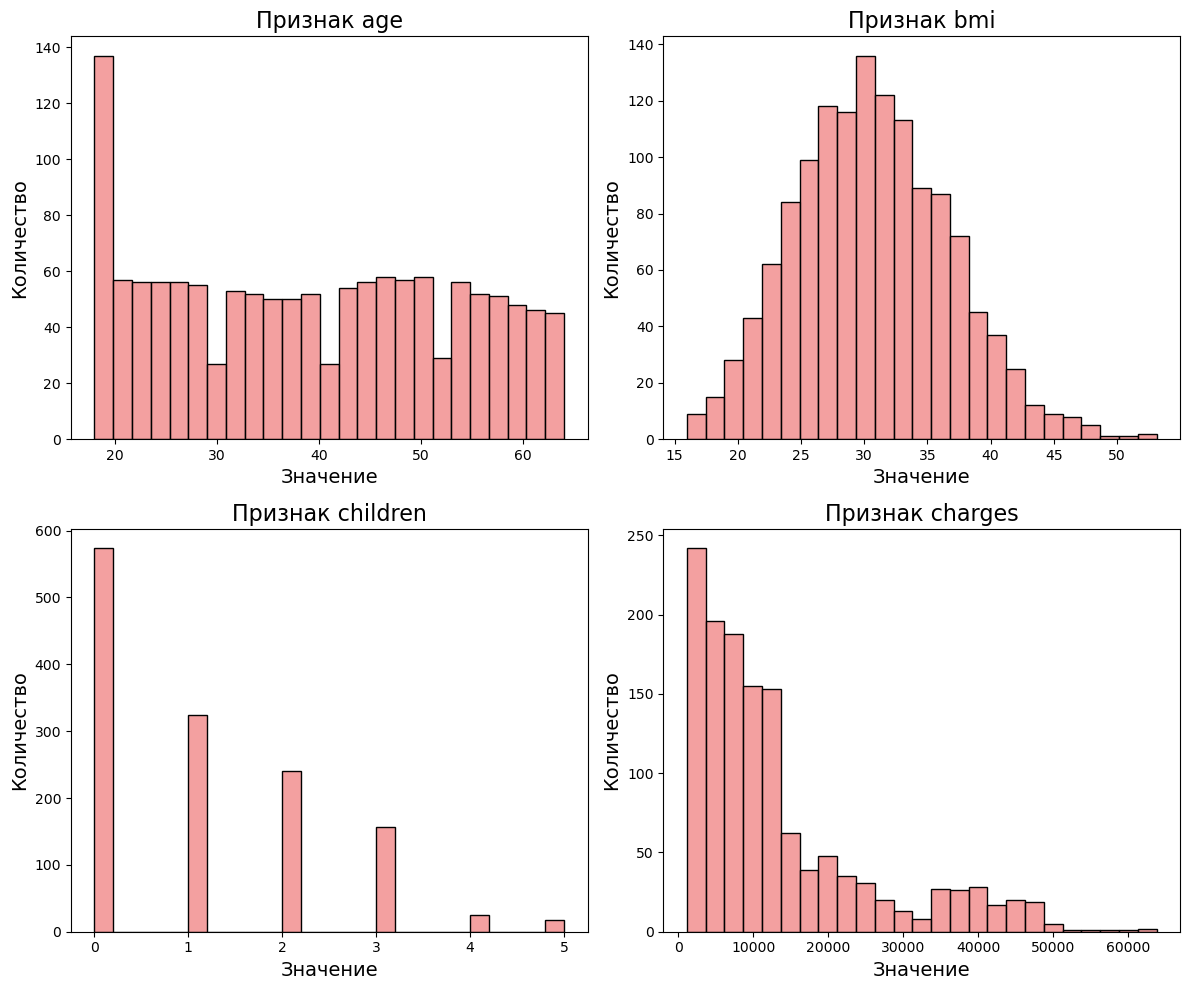

In [4]:
col = ['age', 'bmi', 'children', 'charges']
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
for i, ax in zip(col, ax.flatten()):
    sns.histplot(insurance[i], color='lightcoral', edgecolor='black', bins=25, kde=False, ax=ax)
    ax.set_title(f'Признак {i}', fontsize=16)
    ax.set_xlabel('Значение', fontsize=14)
    ax.set_ylabel('Количество', fontsize=14)
    
plt.tight_layout()
plt.show()

**1. Возраст (age):**
- Распределение возраста имеет относительно равномерный характер с небольшими колебаниями;
- Максимальное количество заявителей приходится на группу возраста около 18-20 лет и 40-50 лет;
- Распределение не имеет ярко выраженных выбросов.

**2. Индекс массы тела (bmi):**
- Распределение индекса массы тела (BMI) имеет нормальный характер со смещением вправо;
- Наибольшее количество заявителей имеют BMI в диапазоне от 25 до 35;
- Имеются выбросы с высокими значениями BMI, что может указывать на наличие ожирения у некоторых участников.

**3. Количество детей (children):**
- Распределение количества детей имеет пик в нуле, что означает, что многие участники не имеют детей;
- Затем количество заявителей уменьшается с увеличением числа детей;
- Есть участники с 3-5 детьми, но их количество сильно уменьшается по сравнению с теми, у кого 0-2 детей.

**4. Расходы (charges):**
- Распределение расходов имеет положительное скошенное распределение с длинным правым хвостом;
- Большинство участников имеют низкие расходы, но есть небольшое количество участников с очень высокими расходами;
- Распределение смещено в сторону высоких расходов, что может быть важным фактором при анализе данных.

# Меры центральной тенденции и меры разброса

bmi
Среднее = 30.66, Медиана = 30.40, Мода = 32.30
Стандартное отклонение = 6.10, Размах = 37.17, Межквартильный размах = 8.38
charges
Среднее = 13270.42, Медиана = 9382.03, Мода = 1639.56
Стандартное отклонение = 12110.01, Размах = 62648.55, Межквартильный размах = 11879.80


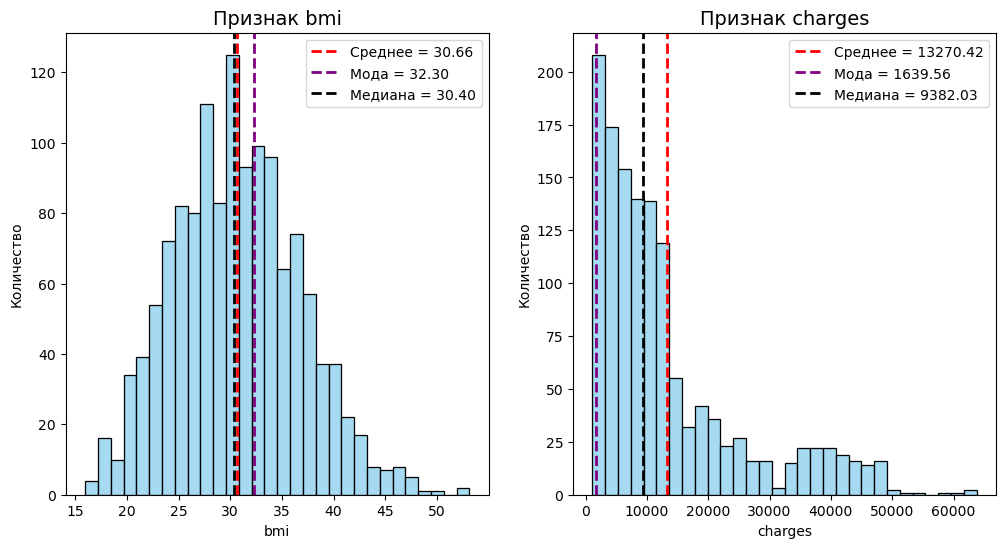

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
for i, ax in zip(['bmi', 'charges'], ax.flatten()):
    mean = insurance[i].mean()
    mode = sts.mode(insurance[i], keepdims=False)[0]
    median = insurance[i].median()
    
    scale = np.max(insurance[i]) - np.min(insurance[i])
    std = insurance[i].std()
    iqr = sts.iqr(insurance[i], interpolation="midpoint")
    
    print(f'{i}\nСреднее = {mean:.2f}, Медиана = {median:.2f}, Мода = {mode:.2f}\n' +
            f'Стандартное отклонение = {std:.2f}, Размах = {scale:.2f}, Межквартильный размах = {iqr:.2f}')    
    sns.histplot(insurance[i], color='skyblue', edgecolor='black', bins=30, kde=False, ax=ax)
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее = {mean:.2f}')
    ax.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Мода = {mode:.2f}')
    ax.axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Медиана = {median:.2f}')
    ax.set_title(f'Признак {i}', fontsize=14)
    ax.legend()
    ax.set_xlabel(i)
    ax.set_ylabel('Количество')

- Для индекса массы тела (BMI) среднее значение и медиана близки друг к другу, что указывает на отсутствие сильных выбросов.
- Распределение BMI близко к нормальному, и стандартное отклонение составляет примерно 6.10, что означает умеренный разброс данных.
- Для расходов (charges) среднее значение (13270.42) сильно отличается от медианы (9382.03), что свидетельствует о наличии выбросов и сильном скошенном распределении.
- Распределение charges имеет длинный правый хвост и большой разброс, как видно по стандартному отклонению (12110.01).

# box-plot для числовых признаков

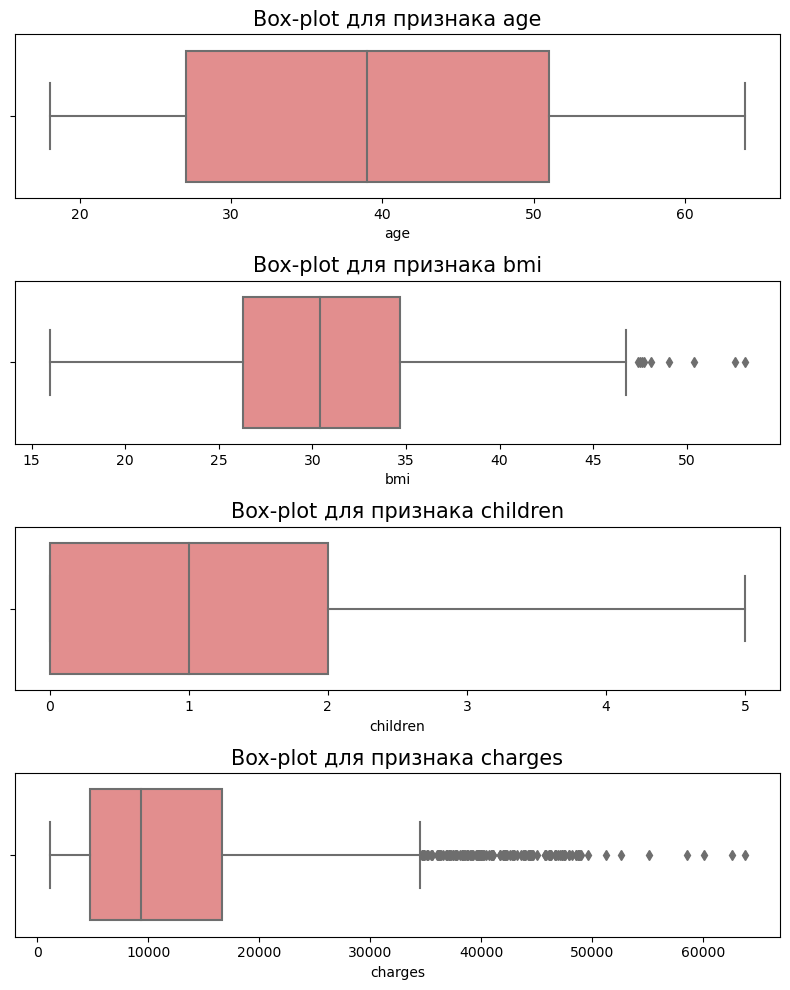

In [6]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

for i, c in enumerate(col):
    sns.boxplot(x=insurance[c], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Box-plot для признака {c}', fontsize=15)

plt.tight_layout()
plt.show()

- Для признака age медиана находится примерно в середине межквартильного размаха, что указывает на отсутствие выбросов.
- Признак bmi имеет несколько выбросов в правой части размаха.
- Признак children имеет несколько выбросов в правой части размаха.
- Признак charges имеет множество выбросов в правой части размаха, а также сильное смещение вправо.

# Центральная предельная теорема

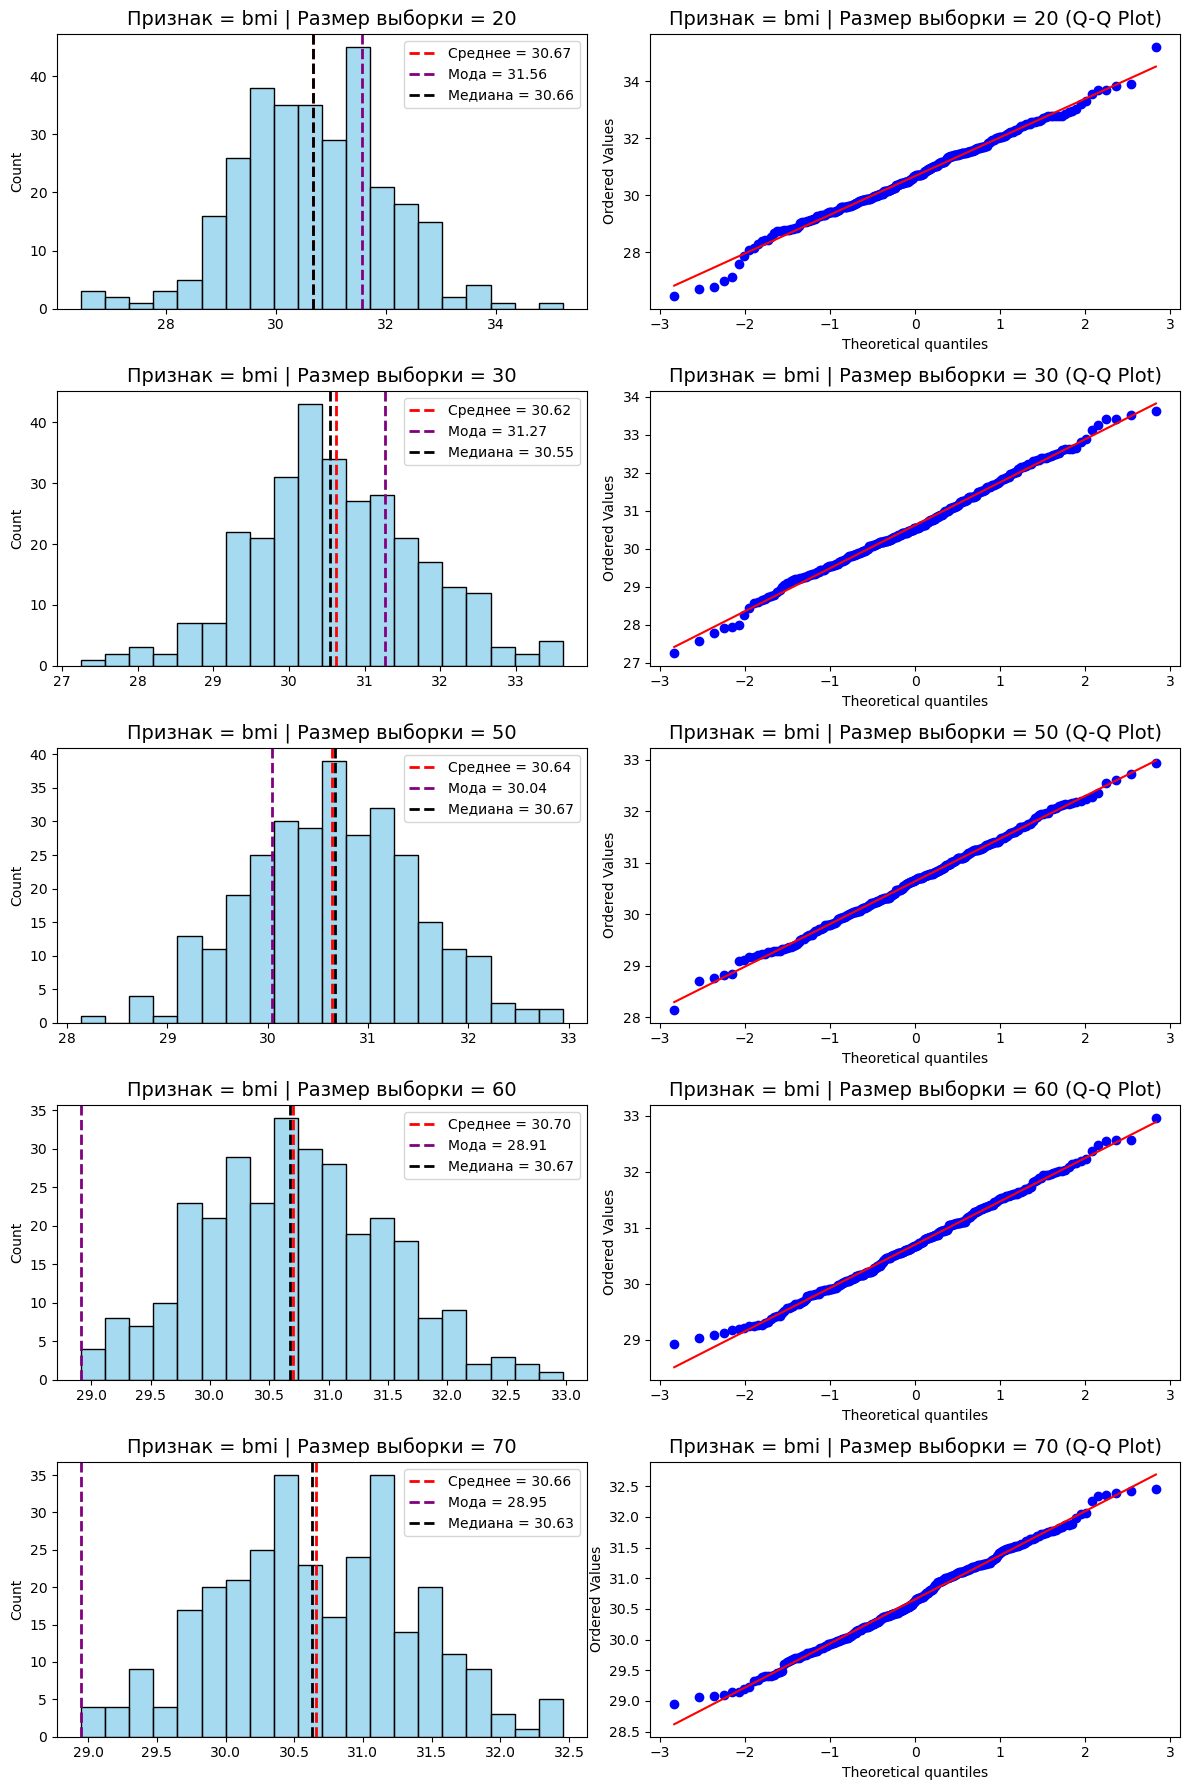

In [7]:
n = [20, 30, 50, 60, 70]
N = 300

fig, ax = plt.subplots(5, 2, figsize=(12, 18))

for i, n in enumerate(n):
    sample_means = []
    for _ in range(N):
        sample = np.random.choice(insurance['bmi'], size=n)
        sample_means.append(np.mean(sample))

    mean = np.mean(sample_means)
    mode = sts.mode(sample_means, keepdims=True)[0][0]
    median = np.median(sample_means)    
    sns.histplot(sample_means, bins=20, color='skyblue', edgecolor='black', ax=ax[i][0])
    ax[i][0].set_title(f'Признак = bmi | Размер выборки = {n}', fontsize=14)
    ax[i][0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее = {mean:.2f}')
    ax[i][0].axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Мода = {mode:.2f}')
    ax[i][0].axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Медиана = {median:.2f}')
    ax[i][0].legend()

    stats.probplot(sample_means, dist="norm", plot=ax[i][1])
    ax[i][1].set_title(f'Признак = bmi | Размер выборки = {n} (Q-Q Plot)', fontsize=14)

plt.tight_layout()
plt.show()

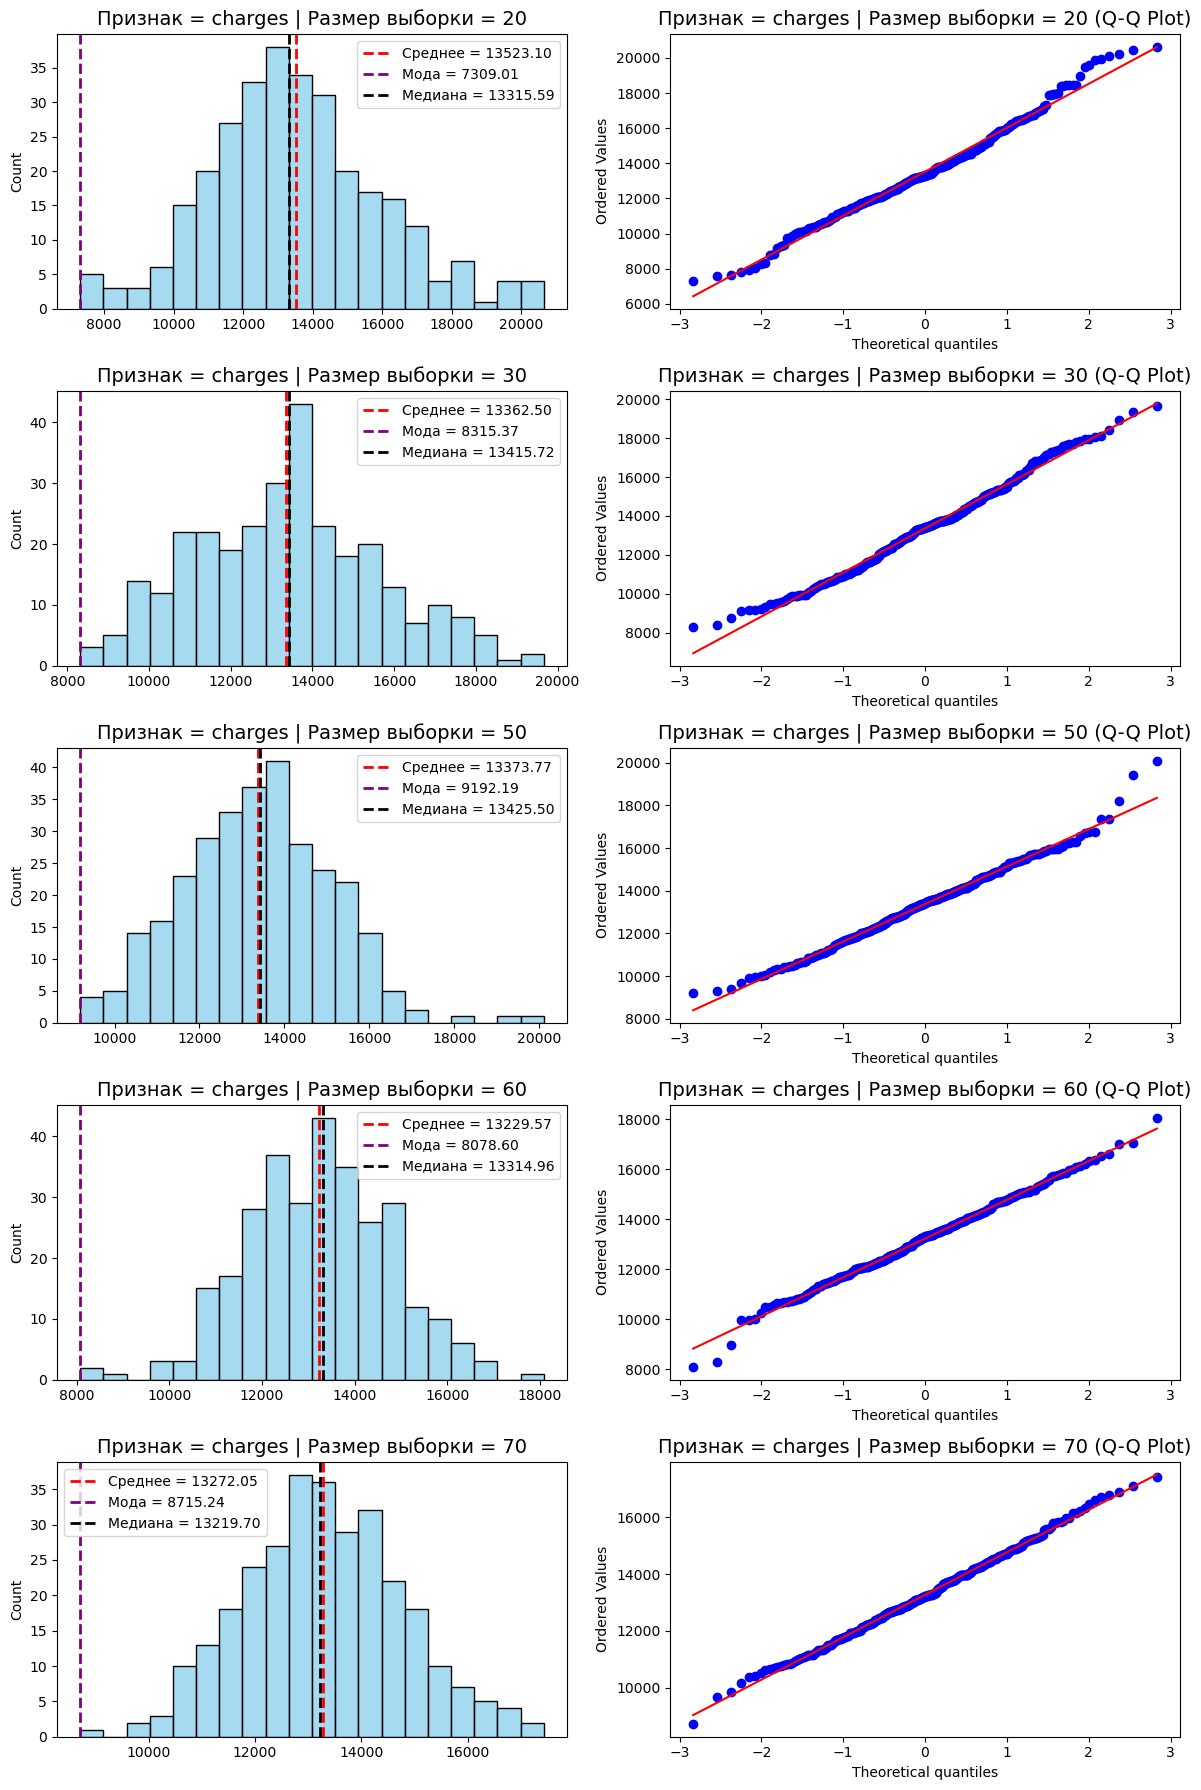

In [8]:
n = [20, 30, 50, 60, 70]
N = 300

fig, ax = plt.subplots(5, 2, figsize=(12, 18))

for i, n in enumerate(n):
    sample_means = []
    for _ in range(N):
        sample = np.random.choice(insurance['charges'], size=n)
        sample_means.append(np.mean(sample))

    mean = np.mean(sample_means)
    mode = sts.mode(sample_means, keepdims=True)[0][0]
    median = np.median(sample_means)    
    sns.histplot(sample_means, bins=20, color='skyblue', edgecolor='black', ax=ax[i][0])
    ax[i][0].set_title(f'Признак = charges | Размер выборки = {n}', fontsize=14)
    ax[i][0].axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее = {mean:.2f}')
    ax[i][0].axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Мода = {mode:.2f}')
    ax[i][0].axvline(median, color='black', linestyle='dashed', linewidth=2, label=f'Медиана = {median:.2f}')
    ax[i][0].legend()

    stats.probplot(sample_means, dist="norm", plot=ax[i][1])
    ax[i][1].set_title(f'Признак = charges | Размер выборки = {n} (Q-Q Plot)', fontsize=14)

plt.tight_layout()
plt.show()

Итак, на основе проведенных анализов и графиков, можно сделать вывод
о том, что центральная предельная теорема выполняется для обоих признаков
bmi и charges при разных размерах выборок

# 95% и 99% доверительный интервал

In [9]:
per = ['95%', '99%']
n = insurance.shape[0]
for i in ['bmi', 'charges']:
    for p, j in enumerate([1.96, 2.58]):
        low = insurance[i].mean() - j * (insurance[i].std()/(n ** (1/2)))
        top = insurance[i].mean() + j * (insurance[i].std()/(n ** (1/2)))
        print(f'{per[p]} доверительный интервал для {i} = [{low}, {top}]')

95% доверительный интервал для bmi = [30.336636967245095, 30.990156754728]
99% доверительный интервал для bmi = [30.233274143714635, 31.093519578258462]
95% доверительный интервал для charges = [12621.53005468252, 13919.314475599993]
99% доверительный интервал для charges = [12416.268233006796, 14124.576297275717]


# Проверка признаков на нормальность интервал
Нулевая гипотеза (H0): Распределение признака соответствует нормальному распределению.

Альтернативная гипотеза (H1): Распределение признака не соответствует нормальному распределению.

Проверка на нормальность с помощью KS-теста и Q-Q plot

Признак = bmi KstestResult(statistic=0.02613962682509635, pvalue=0.31453976932347394, statistic_location=-0.27697218531780776, statistic_sign=1)
Признак = charges KstestResult(statistic=0.18846204110424236, pvalue=4.39305730768502e-42, statistic_location=0.016557596433631947, statistic_sign=1)


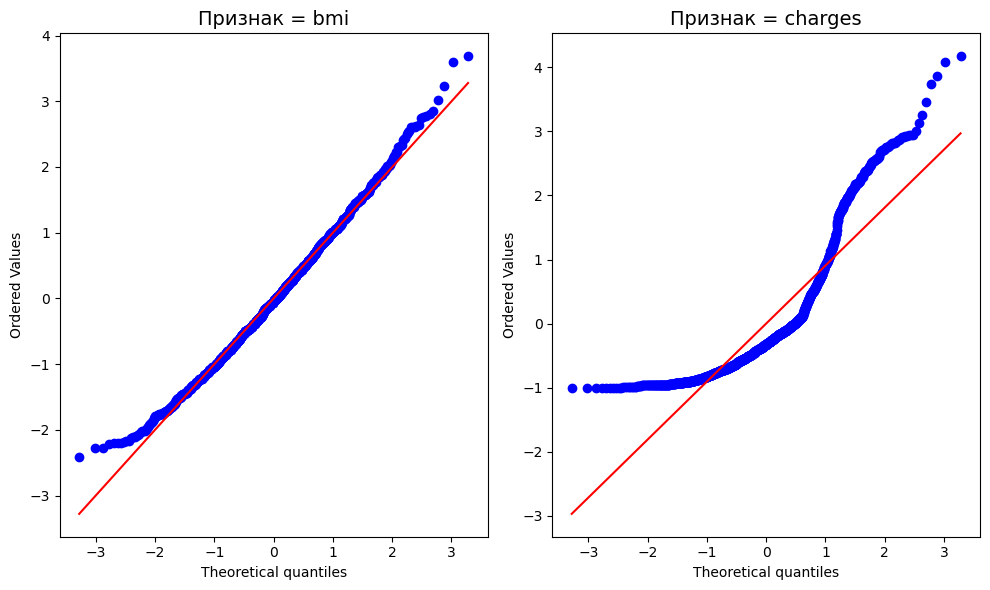

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
for i, col_name in enumerate(['bmi', 'charges']):
    col = stats.zscore(insurance[col_name])
    stats.probplot(col, dist="norm", plot=ax[i])
    ax[i].set_title(f'Признак = {col_name}', fontsize=14)
    print(f'Признак = {col_name}', stats.kstest(col, 'norm'))
    
plt.tight_layout()
plt.show()

# Загрузка и просмотр данных ECDCCases

In [11]:
data = pd.read_csv('ECDCCases.csv')
data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,12/12/2020,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
4,11/12/2020,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
5,10/12/2020,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
6,09/12/2020,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
7,08/12/2020,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
8,07/12/2020,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
9,06/12/2020,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160


In [12]:
data.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          275
countryterritoryCode                                           123
popData2019                                                    123
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2879
dtype: int64

In [13]:
for column in data.columns:
    print(f'{column}: {round(np.mean(data[column].isna()*100), 1)}%')

dateRep: 0.0%
day: 0.0%
month: 0.0%
year: 0.0%
cases: 0.0%
deaths: 0.0%
countriesAndTerritories: 0.0%
geoId: 0.4%
countryterritoryCode: 0.2%
popData2019: 0.2%
continentExp: 0.0%
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: 4.7%


In [14]:
data.drop(['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'geoId'], axis=1, inplace=True)
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp
0,14/12/2020,14,12,2020,746,6,Afghanistan,AFG,38041757.0,Asia
1,13/12/2020,13,12,2020,298,9,Afghanistan,AFG,38041757.0,Asia
2,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
3,12/12/2020,12,12,2020,113,11,Afghanistan,AFG,38041757.0,Asia
4,11/12/2020,11,12,2020,63,10,Afghanistan,AFG,38041757.0,Asia
...,...,...,...,...,...,...,...,...,...,...
61899,25/03/2020,25,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61900,24/03/2020,24,3,2020,0,1,Zimbabwe,ZWE,14645473.0,Africa
61901,23/03/2020,23,3,2020,0,0,Zimbabwe,ZWE,14645473.0,Africa
61902,22/03/2020,22,3,2020,1,0,Zimbabwe,ZWE,14645473.0,Africa


In [15]:
data['countryterritoryCode'].fillna('other', inplace=True)
data['popData2019'].fillna(data['popData2019'].median(), inplace=True)
data.isna().sum()

dateRep                    0
day                        0
month                      0
year                       0
cases                      0
deaths                     0
countriesAndTerritories    0
countryterritoryCode       0
popData2019                0
continentExp               0
dtype: int64

In [16]:
data.describe()

,day,month,year,cases,deaths,popData2019
count,61904.000000,61904.000000,61904.000000,61904.000000,61904.000000,6.190400e+04
mean,15.629232,7.067104,2019.998918,1155.079026,26.053987,4.091909e+07
std,8.841624,2.954816,0.032881,6779.010824,131.222948,1.529798e+08
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06
50%,15.000000,7.000000,2020.000000,15.000000,0.000000,7.169456e+06
75%,23.000000,10.000000,2020.000000,273.000000,4.000000,2.851583e+07
max,31.000000,12.000000,2020.000000,234633.000000,4928.000000,1.433784e+09


Поиск стран со смертность в день более 3000 и удаление
дубликатов

In [17]:
data[data['deaths'] > 3000]['countriesAndTerritories'].value_counts()

United_States_of_America    6
Peru                        2
Argentina                   1
Ecuador                     1
Mexico                      1
Name: countriesAndTerritories, dtype: int64

In [18]:
print('Всего дубликатов',data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)
print('Всего дубликатов',data.duplicated().sum())

Всего дубликатов 4
Всего дубликатов 0


In [22]:
northwest_data = insurance[insurance['region'] == 'northwest']['bmi']
southwest_data = insurance[insurance['region'] == 'southwest']['bmi']
print(northwest_data)
print(southwest_data)

3       22.705
4       28.880
7       27.740
9       25.840
24      28.025
         ...  
1319    26.315
1320    31.065
1324    25.935
1333    30.970
1337    29.070
Name: bmi, Length: 325, dtype: float64
0       27.9
12      34.4
15      24.6
18      40.3
19      35.3
        ... 
1316    20.6
1329    38.6
1331    33.4
1332    44.7
1336    25.8
Name: bmi, Length: 325, dtype: float64


Проверка выборок на критерий Шапиро-Уилка, Бартлетта
и Стьюдента

In [26]:
print(f'Критерий Шапиро-Уилка\nРегион northwest: {sts.shapiro(northwest_data)}'
        f'\nРегион southwest: {sts.shapiro(southwest_data)}')
print(f'Критерий Бартлетта: {sts.bartlett(northwest_data, southwest_data)}')
print(f'Критерий Стьюдента: {sts.ttest_ind(northwest_data, southwest_data)}')

Критерий Шапиро-Уилка
Регион northwest: ShapiroResult(statistic=0.9954646825790405, pvalue=0.4655335247516632)
Регион southwest: ShapiroResult(statistic=0.9949268698692322, pvalue=0.3629520535469055)
Критерий Бартлетта: BartlettResult(statistic=3.4000745256463825, pvalue=0.06519347353580048)
Критерий Стьюдента: Ttest_indResult(statistic=-3.2844171500398582, pvalue=0.001076958496307695)


По критерию **Шапиро-Уилка** p значение больше 0.05, значит
распределение выборок является нормальным.

По критерию **Бартлетта** p
значение превышает 0.05, следовательно, дисперсии выборок примерно
одинаковы. 

По критерию **Стьюдента** p значение значительно ниже 0.05,
следовательно нулевая гипотеза отвергается, выборки принадлежат к разным
генеральным совокупностям и их средние значения различно.

# Задача с кубиками

In [34]:
sq = pd.DataFrame({'Observed': [97, 98, 109, 95, 97, 104],
                  'Expected': [100, 100, 100, 100, 100, 100]})
                  
sq

,Observed,Expected
0,97,100
1,98,100
2,109,100
3,95,100
4,97,100
5,104,100


Проверка с помощью критерия Хи-квадрат

In [35]:
stats.chisquare(sq['Observed'], sq['Expected'])

Power_divergenceResult(statistic=1.44, pvalue=0.9198882077437889)

Основываясь на p-value делаем вывод, что распределение равномерное.

# Проверка переменных на зависимость

In [36]:
data = pd.DataFrame({'Женат': [89, 17, 11, 43, 22, 1],
                     'Гражданский брак': [80, 22, 20, 35, 6, 4],
                     'Не состоит в отношениях': [35, 44, 35, 6, 8, 22]})

data.index = ['Полный рабочий день','Частичная занятость','Временно не работает',
              'На домохозяйстве','На пенсии','Учёба']
data

,Женат,Гражданский брак,Не состоит в отношениях
Полный рабочий день,89,80,35
Частичная занятость,17,22,44
Временно не работает,11,20,35
На домохозяйстве,43,35,6
На пенсии,22,6,8
Учёба,1,4,22


In [40]:
stats.chi2_contingency(data)[:3]

(122.29654948595365, 1.7291616900960234e-21, 10)

Проверка с помощью критерия Хи-квадрат переменные на
зависимость

p-значение намного ниже 0.05, значит семейное положение значительно
влияет на занятость.